In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [51]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [52]:
x_train.shape

(50000, 32, 32, 3)

In [53]:
y_train.shape

(50000, 1)

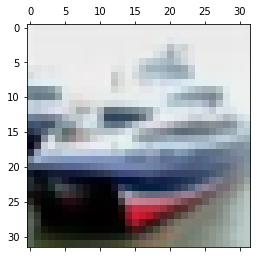

In [54]:
plt.matshow(x_test[1])

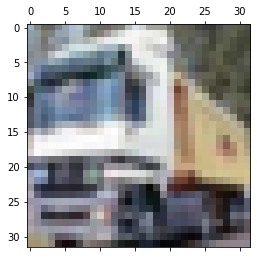

In [55]:
plt.matshow(x_train[1])

In [56]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [57]:
model = keras.models.Sequential()

inputs = keras.Input(shape=(32*32*3,))
x = layers.Dense(200, activation="relu", name="dense_1")(inputs)
x = layers.Dense(200, activation="relu", name="dense_2")(x)
outputs = layers.Dense(50, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [58]:
x_train = x_train.reshape(50000, 3072, -1).astype("float32") / 255
x_test = x_test.reshape(10000, 3072, -1).astype("float32") /255

In [59]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

In [60]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
predictions (Dense)          (None, 50)                10050     
Total params: 664,850
Trainable params: 664,850
Non-trainable params: 0
_________________________________________________________________


In [65]:
from keras import optimizers

model.compile(loss = keras.losses.SparseCategoricalCrossentropy(),
              optimizer = keras.optimizers.SGD(),
              metrics = [keras.metrics.SparseCategoricalAccuracy()])

In [66]:
model.fit(x_train,y_train, epochs = 20, batch_size=64)

Epoch 1/20
782/782 [==============================] - 5s 7ms/step - loss: 0.9708 - sparse_categorical_accuracy: 0.6548
Epoch 2/20
782/782 [==============================] - 5s 7ms/step - loss: 0.9560 - sparse_categorical_accuracy: 0.6612
Epoch 3/20
782/782 [==============================] - 5s 7ms/step - loss: 0.9498 - sparse_categorical_accuracy: 0.6624
Epoch 4/20
782/782 [==============================] - 5s 6ms/step - loss: 0.9474 - sparse_categorical_accuracy: 0.6641
Epoch 5/20
782/782 [==============================] - 5s 6ms/step - loss: 0.9440 - sparse_categorical_accuracy: 0.6649
Epoch 6/20
782/782 [==============================] - 5s 7ms/step - loss: 0.9409 - sparse_categorical_accuracy: 0.6662
Epoch 7/20
782/782 [==============================] - 5s 7ms/step - loss: 0.9383 - sparse_categorical_accuracy: 0.6665
Epoch 8/20
782/782 [==============================] - 5s 7ms/step - loss: 0.9363 - sparse_categorical_accuracy: 0.6679
Epoch 9/20
782/782 [============================

In [67]:
x_test.shape

(10000, 3072, 1)

In [68]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4833 - sparse_categorical_accuracy: 0.5213


[1.483290672302246, 0.5213000178337097]

In [69]:
y_pred = model.predict(x_test)

In [84]:
y_pred = np.array(y_pred)

In [85]:
y_pred.shape

(10000, 50)

In [71]:
y_pred[1]

array([1.7383661e-03, 1.4862775e-02, 7.9846988e-04, 1.3162001e-04,
       3.3886248e-05, 4.9097625e-06, 4.6864207e-06, 2.3527135e-05,
       9.0265834e-01, 7.9743348e-02, 6.8848478e-31, 9.7079741e-30,
       9.2482313e-30, 5.1181242e-30, 6.3716316e-28, 3.7287791e-29,
       8.1862574e-31, 5.6312284e-29, 7.6518009e-30, 4.4585252e-30,
       1.4132827e-30, 5.2783403e-28, 3.2172792e-29, 2.9553034e-30,
       1.2811660e-30, 9.5515298e-29, 3.9973148e-29, 7.5716536e-32,
       2.1485540e-31, 4.1723044e-31, 4.7980811e-31, 5.1733433e-29,
       9.5248960e-29, 6.1571262e-30, 1.8919408e-28, 4.5868570e-31,
       1.0770160e-30, 6.6900085e-28, 3.6241900e-29, 1.9392317e-28,
       2.4254086e-30, 5.2785996e-29, 1.6783605e-29, 4.1058506e-30,
       1.2439865e-30, 1.3391121e-28, 2.5260422e-29, 2.4275678e-28,
       1.3091786e-30, 2.1176358e-29], dtype=float32)

In [72]:
np.argmax(y_pred[1])

8

In [76]:
y_pred[10]

array([7.0594132e-01, 3.5257463e-04, 9.1436803e-02, 7.6394066e-02,
       1.2698682e-02, 2.8006958e-02, 5.2822009e-02, 2.7435429e-03,
       2.9454803e-02, 1.4915899e-04, 4.5972431e-23, 1.2068735e-20,
       9.2744779e-22, 1.7499655e-20, 1.3639770e-20, 2.0245675e-19,
       7.5748070e-22, 3.6282300e-20, 7.1631529e-22, 4.1560588e-20,
       1.9610800e-20, 2.2123240e-20, 2.4232460e-20, 2.6430925e-20,
       1.0991721e-21, 1.6228739e-20, 3.9447516e-20, 4.3203769e-22,
       9.4692773e-22, 2.2245321e-23, 5.2309452e-23, 1.1471258e-20,
       2.7500485e-20, 3.0049248e-21, 2.9733317e-19, 6.6654425e-22,
       4.6390522e-21, 8.5562601e-19, 5.3936464e-20, 2.0320874e-20,
       2.5799933e-21, 2.0653246e-20, 6.3939575e-20, 6.4174611e-21,
       1.5422661e-21, 9.5874474e-21, 1.5289352e-19, 8.9914726e-20,
       1.9693543e-22, 2.6513934e-20], dtype=float32)

In [77]:
np.argmax(y_pred[10])

0